In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-90.000,high=90.000,size=1500)

# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple.
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
# for coordinate in coordinates:
#     print(coordinate[0], coordinate[1])

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | santa maria
Processing Record 3 of Set 1 | surt
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | gat
Processing Record 9 of Set 1 | vardo
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | olafsvik
Processing Record 12 of Set 1 | yelan
Processing Record 13 of Set 1 | moiyabana
City not found. Skipping...
Processing Record 14 of Set 1 | quatre cocos
Processing Record 15 of Set 1 | bilsanda
Processing Record 16 of Set 1 | laguna
Processing Record 17 of Set 1 | henties bay
Processing Record 18 of Set 1 | aguimes
Processing Record 19 of Set 1 | sao filipe
Processing Record 20 of Set 1 | donskoye
Processing Record 21 of Set 1 | 

Processing Record 38 of Set 4 | jabinyanah
Processing Record 39 of Set 4 | lebu
Processing Record 40 of Set 4 | altay
Processing Record 41 of Set 4 | peniche
Processing Record 42 of Set 4 | jalu
Processing Record 43 of Set 4 | segou
Processing Record 44 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 45 of Set 4 | baixo guandu
Processing Record 46 of Set 4 | tshela
Processing Record 47 of Set 4 | mehran
Processing Record 48 of Set 4 | nanortalik
Processing Record 49 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 50 of Set 4 | grindavik
Processing Record 1 of Set 5 | orsha
Processing Record 2 of Set 5 | goksun
Processing Record 3 of Set 5 | vallenar
Processing Record 4 of Set 5 | gora
Processing Record 5 of Set 5 | atasu
Processing Record 6 of Set 5 | chapais
Processing Record 7 of Set 5 | port hope
Processing Record 8 of Set 5 | marawi
Processing Record 9 of Set 5 | havre-saint-pierre
Processing Record 10 of Set 5 | umm lajj
Processing Record 11 o

Processing Record 32 of Set 8 | ibra
Processing Record 33 of Set 8 | kljajicevo
Processing Record 34 of Set 8 | ambilobe
Processing Record 35 of Set 8 | puerto cabezas
Processing Record 36 of Set 8 | harper
Processing Record 37 of Set 8 | buraydah
Processing Record 38 of Set 8 | malpe
Processing Record 39 of Set 8 | porto recanati
Processing Record 40 of Set 8 | kalemie
Processing Record 41 of Set 8 | rafai
Processing Record 42 of Set 8 | aksarka
Processing Record 43 of Set 8 | lithakia
Processing Record 44 of Set 8 | kasama
Processing Record 45 of Set 8 | kalivia thorikou
City not found. Skipping...
Processing Record 46 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 47 of Set 8 | wenchi
Processing Record 48 of Set 8 | duma
Processing Record 49 of Set 8 | jardim
Processing Record 50 of Set 8 | atar
Processing Record 1 of Set 9 | lubango
Processing Record 2 of Set 9 | lachhmangarh
Processing Record 3 of Set 9 | sisimiut
Processing Record 4 of Set 9 | zaozerne
Processi

Processing Record 17 of Set 12 | pisco
Processing Record 18 of Set 12 | san cristobal
Processing Record 19 of Set 12 | bantry
Processing Record 20 of Set 12 | mogadishu
Processing Record 21 of Set 12 | monrovia
Processing Record 22 of Set 12 | puerto colombia
Processing Record 23 of Set 12 | iquique
Processing Record 24 of Set 12 | apatou
Processing Record 25 of Set 12 | wilmington
Processing Record 26 of Set 12 | geresk
City not found. Skipping...
Processing Record 27 of Set 12 | dinard
Processing Record 28 of Set 12 | kibaya
Processing Record 29 of Set 12 | bolshoy tsaryn
City not found. Skipping...
Processing Record 30 of Set 12 | kinkala
Processing Record 31 of Set 12 | valdivia
Processing Record 32 of Set 12 | jibuti
Processing Record 33 of Set 12 | blagoyevo
Processing Record 34 of Set 12 | masuguru
Processing Record 35 of Set 12 | carora
Processing Record 36 of Set 12 | bambui
Processing Record 37 of Set 12 | salta
Processing Record 38 of Set 12 | thunder bay
Processing Record 3

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,49.80,71,3,4.23,ZA,2022-09-12 21:30:42
1,Santa Maria,-29.6842,-53.8069,65.50,68,20,2.30,BR,2022-09-12 21:30:43
2,Surt,31.2089,16.5887,80.10,72,0,8.39,LY,2022-09-12 21:30:43
3,Ushuaia,-54.8000,-68.3000,46.06,53,40,4.61,AR,2022-09-12 21:30:44
4,Hamilton,39.1834,-84.5333,72.64,55,40,13.80,US,2022-09-12 21:27:52
5,Gat,31.6100,34.7642,77.68,100,0,0.78,IL,2022-09-12 21:30:45
6,Vardo,70.3705,31.1107,40.98,93,100,6.91,NO,2022-09-12 21:30:45
7,Port Elizabeth,-33.9180,25.5701,53.89,83,0,5.75,ZA,2022-09-12 21:30:45
8,Olafsvik,64.8945,-23.7142,49.26,90,70,11.79,IS,2022-09-12 21:30:46
9,Yelan,50.9490,43.7378,58.39,39,100,20.02,RU,2022-09-12 21:30:46


In [9]:
column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[column_order]

In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

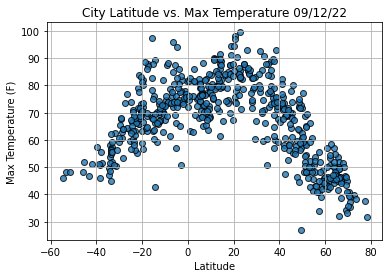

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

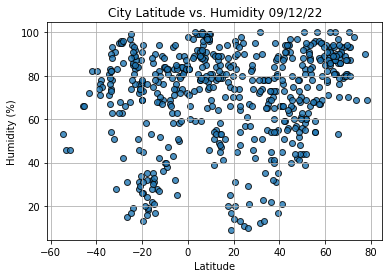

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

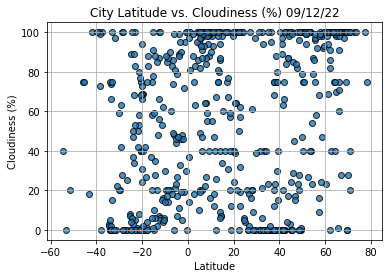

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

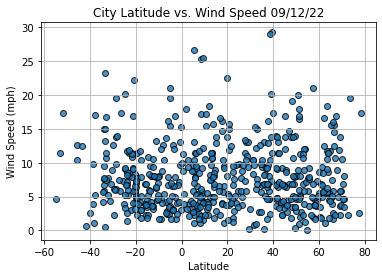

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()